# Import Data Set

In [14]:

import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [8]:
import pandas as pd
delivery = pd.read_csv("C:\\Users\\HP\\Downloads\\delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data=delivery.copy()

In [11]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [13]:
data_cleaned1=data.drop_duplicates()

<AxesSubplot:>

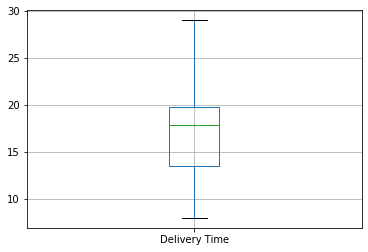

In [18]:
data_cleaned1.boxplot(column=['Delivery Time'])

<AxesSubplot:>

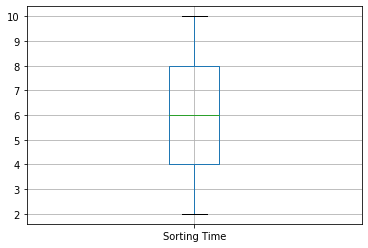

In [20]:
data_cleaned1.boxplot(column=['Sorting Time'])

In [21]:
# box plots indicates that there is no outlier in the data

In [26]:
data_cleaned1.isnull().value_counts() #no null value is in data

Delivery Time  Sorting Time
False          False           21
dtype: int64

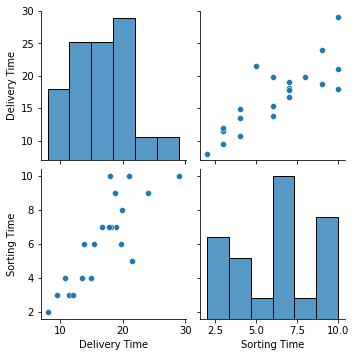

In [29]:
import seaborn as sns

sns.pairplot(data_cleaned1)

In [31]:
data_cleaned1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [33]:
data_cleaned1 = data_cleaned1.rename({'Delivery Time': 'Delivery'}, axis=1)
data_cleaned1 = data_cleaned1.rename({'Sorting Time': 'Sorting'}, axis=1)
data_cleaned1.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

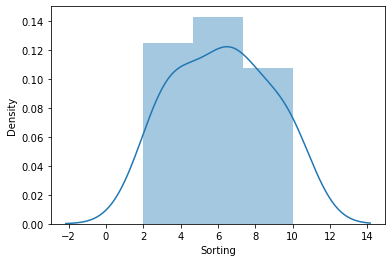

In [51]:
import seaborn as sns
sns.distplot(data_cleaned1['Sorting'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

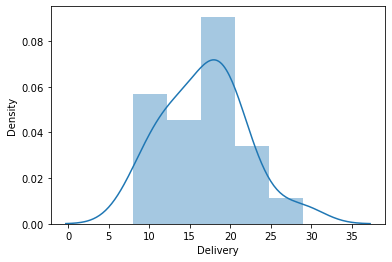

In [53]:
sns.distplot(data_cleaned1['Delivery'])

Fitting a Linear Regression Model

In [54]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery~Sorting", data = data_cleaned1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.98e-06
Time:                        13:53:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

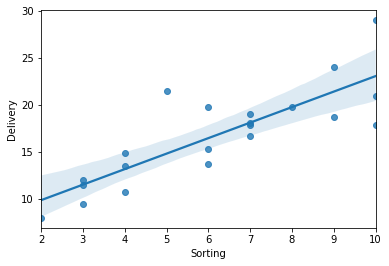

In [55]:
sns.regplot(x="Sorting", y="Delivery", data=data_cleaned1);

In [56]:
#Coefficients
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [57]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [58]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [59]:

newdata=pd.Series([5])

In [62]:
data_pred=pd.DataFrame(newdata,columns=['Sorting'])

In [63]:
model.predict(data_pred)

0    14.827833
dtype: float64

In [79]:
sorting_log = np.log(data_cleaned1['Sorting'])


In [80]:
sorting_sq = data_cleaned1['Sorting']**2


In [81]:
sorting_exp = np.exp(data_cleaned1['Sorting'])

In [82]:
sorting_sqrt = data_cleaned1['Sorting']**(1/2)


In [97]:
delivery1 = pd.concat([data_cleaned1, sorting_log, sorting_sq, sorting_exp, sorting_sqrt], axis=1)

delivery1.columns = ['Delivery','Sorting','sorting_log','sorting_sq','sorting_exp','sorting_sqrt']
delivery1.head()

,Delivery,Sorting,sorting_log,sorting_sq,sorting_exp,sorting_sqrt
0,21.00,10,2.302585,100,22026.465795,3.162278
1,13.50,4,1.386294,16,54.598150,2.000000
2,19.75,6,1.791759,36,403.428793,2.449490
3,24.00,9,2.197225,81,8103.083928,3.000000
4,29.00,10,2.302585,100,22026.465795,3.162278


In [99]:
# Fitting log transformed model


In [92]:
import statsmodels.formula.api as smf
model1 = smf.ols("Delivery~sorting_log", data = delivery1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.64e-06
Time:                        14:55:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
sorting_log     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

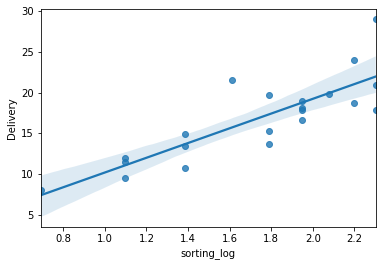

In [91]:
sns.regplot(x="sorting_log", y="Delivery", data=delivery1);

In [93]:
model1.params

Intercept      1.159684
sorting_log    9.043413
dtype: float64

In [95]:
print(model1.tvalues, '\n', model1.pvalues)    

Intercept      0.472460
sorting_log    6.586789
dtype: float64 
 Intercept      0.641980
sorting_log    0.000003
dtype: float64


In [96]:
(model1.rsquared,model1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [102]:
# Predicting values using log transformed
newdata=pd.Series([5])

In [103]:
data_pred=pd.DataFrame(newdata,columns=['sorting_log'])

In [104]:
model1.predict(data_pred)

0    46.376751
dtype: float64

In [107]:
# Fitting log transformed model
import statsmodels.formula.api as smf
model2 = smf.ols("Delivery~sorting_sq", data = delivery1).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.74e-05
Time:                        15:06:27   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2372      1.196      9.399      0.000       8.735      13.740
sorting_sq     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

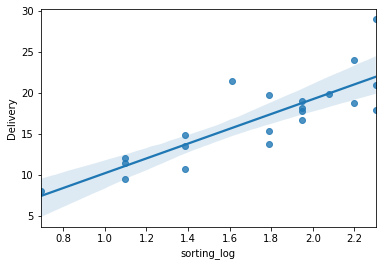

In [109]:
sns.regplot(x="sorting_log", y="Delivery", data=delivery1);

In [115]:
model2.params

Intercept     11.237205
sorting_sq     0.124870
dtype: float64

In [116]:
print(model2.tvalues, '\n', model1.pvalues)

Intercept     9.398601
sorting_sq    5.691330
dtype: float64 
 Intercept      0.641980
sorting_log    0.000003
dtype: float64


In [114]:
(model2.rsquared,model2.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [117]:
newdata=pd.Series([5])

In [118]:
data_pred=pd.DataFrame(newdata,columns=['sorting_sq'])

In [119]:
model2.predict(data_pred)

0    11.861556
dtype: float64

In [120]:
# Fitting exp transformed model

In [122]:
import statsmodels.formula.api as smf
model3 = smf.ols("Delivery~sorting_exp", data = delivery1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 05 May 2021   Prob (F-statistic):            0.00396
Time:                        15:10:28   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0836      1.047     14.406      0.000      12.892      17.275
sorting_exp     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

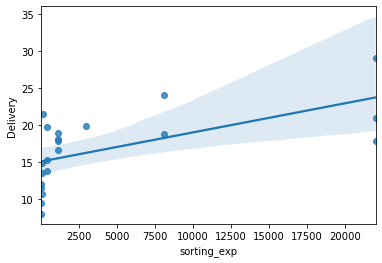

In [124]:
sns.regplot(x="sorting_exp", y="Delivery", data=delivery1);

In [125]:
model3.params

Intercept      15.083578
sorting_exp     0.000393
dtype: float64

In [127]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept      14.406456
sorting_exp     3.277108
dtype: float64 
 Intercept      1.117304e-11
sorting_exp    3.964511e-03
dtype: float64


In [129]:
(model3.rsquared,model3.rsquared_adj)

(0.361117702270909, 0.3274923181799042)

In [130]:
newdata=pd.Series([5])

In [131]:
data_pred=pd.DataFrame(newdata,columns=['sorting_exp'])

In [133]:
model3.predict(data_pred)

0    15.085543
dtype: float64

In [135]:
# Fitting sqrt transformed model


In [137]:
import statsmodels.formula.api as smf
model4 = smf.ols("Delivery~sorting_sqrt", data = delivery1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.61e-06
Time:                        15:14:21   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5188      2.995     -0.841      0.411      -8.788       3.751
sorting_sqrt     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

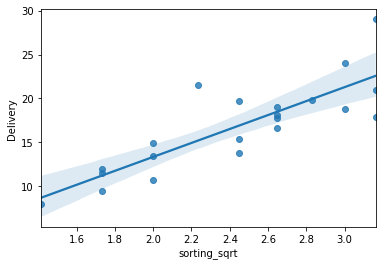

In [140]:
sns.regplot(x="sorting_sqrt", y="Delivery", data=delivery1);

In [142]:
model4.params

Intercept      -2.518837
sorting_sqrt    7.936591
dtype: float64

In [144]:
print(model4.tvalues, '\n', model4.pvalues) 

Intercept      -0.840911
sorting_sqrt    6.592434
dtype: float64 
 Intercept       0.410857
sorting_sqrt    0.000003
dtype: float64


In [146]:
(model4.rsquared,model4.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [147]:
newdata=pd.Series([5])


In [148]:
data_pred=pd.DataFrame(newdata,columns=['sorting_sqrt'])

In [149]:
model4.predict(data_pred)

0    37.164117
dtype: float64